In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
meter_linear = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_linear.csv', index_col='Time', parse_dates=True)
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_weather.csv', index_col='Time', parse_dates=True).drop('Unnamed: 0', axis=1)
#pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_quadratic.csv', index_col='Time', parse_dates=True)
#pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_cubic.csv', index_col='Time', parse_dates=True)
#pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_poly2.csv', index_col='Time', parse_dates=True)
#pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_poly3.csv', index_col='Time', parse_dates=True)

In [ ]:
df_combine = pd.concat([weather, meter_linear], axis=1)
df_combine.head()

,pm10,pm2.5,temp,humid,female_1,female_2,female_3,female_4,female_6,female_8,male_3,male_4,male_5,bundit,csb2_pailom,dean_edu,food_indus,itsc_front,language,mechanical_2,old_art,rh_cmu,serve_techsci,test_animal
Time,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-07 00:00:00,NaN,NaN,NaN,NaN,886938.62,718898.370,613868.74,702512.000000,437358.340,478461.89,890476.29,801161.280000,NaN,920899.78,2952616.19,593340.22,1328596.86,NaN,804944.64,204614.27,873830.40,527942.8500,158004.00,1928848.90
2020-02-07 00:15:00,NaN,NaN,NaN,NaN,886945.47,718905.155,613876.46,702517.353333,437365.150,478468.54,890481.60,801170.180000,NaN,920904.32,2952632.83,593342.14,1328617.34,NaN,804946.88,204614.99,873835.07,527946.4000,158005.14,1928864.13
2020-02-07 00:30:00,NaN,NaN,NaN,NaN,886952.45,718911.940,613884.18,702522.706667,437372.685,478475.14,890486.59,801178.110000,NaN,920908.80,2952648.45,593344.13,1328638.08,NaN,804949.12,204615.70,873839.94,527949.7600,158006.29,1928882.30
2020-02-07 00:45:00,NaN,NaN,NaN,NaN,886960.26,718918.210,613891.90,702528.060000,437380.220,478481.25,890491.46,801186.500000,NaN,920913.15,2952664.58,593346.11,1328657.54,NaN,804951.42,204616.46,873844.93,527953.3400,158007.25,1928904.70
2020-02-07 01:00:00,NaN,NaN,NaN,NaN,886967.17,718924.540,613896.77,702532.610000,437385.730,478486.98,890496.19,801194.136667,NaN,920917.57,2952680.45,593348.03,1328677.25,NaN,804953.73,204617.15,873849.02,527957.3975,158008.30,1928923.26


In [ ]:
df_combine.isna().sum()

pm10             52
pm2.5            52
temp             52
humid            52
female_1          0
female_2          0
female_3          0
female_4          0
female_6          0
female_8          0
male_3            0
male_4            0
male_5           34
bundit            0
csb2_pailom       0
dean_edu          0
food_indus        0
itsc_front       34
language          0
mechanical_2      0
old_art           0
rh_cmu            0
serve_techsci     0
test_animal       0
dtype: int64

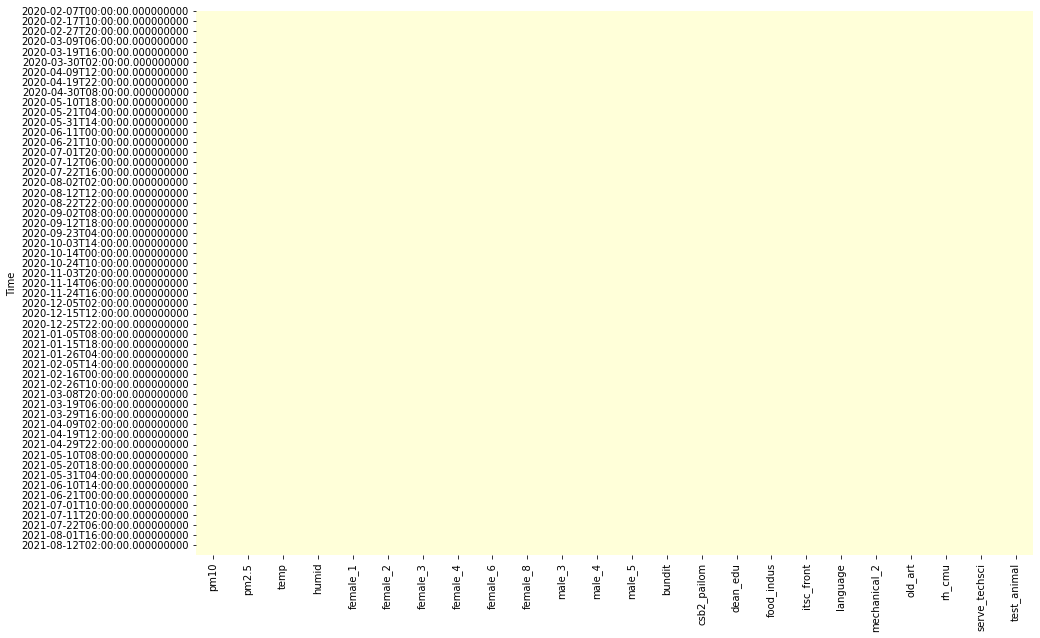

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_combine.isnull(), cbar=False, cmap="YlGnBu")

In [ ]:
elec_use = df_combine.copy()
elec_use.iloc[:, 4:] = elec_use.iloc[:, 4:].diff()
elec_use

,pm10,pm2.5,temp,humid,female_1,female_2,female_3,female_4,female_6,female_8,male_3,male_4,male_5,bundit,csb2_pailom,dean_edu,food_indus,itsc_front,language,mechanical_2,old_art,rh_cmu,serve_techsci,test_animal
Time,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-07 00:15:00,NaN,NaN,NaN,NaN,6.85,6.785,7.72,5.353333,6.810,6.65,5.31,8.900000,NaN,4.54,16.64,1.92,20.48,NaN,2.24,0.72,4.67,3.5500,1.14,15.23
2020-02-07 00:30:00,NaN,NaN,NaN,NaN,6.98,6.785,7.72,5.353333,7.535,6.60,4.99,7.930000,NaN,4.48,15.62,1.99,20.74,NaN,2.24,0.71,4.87,3.3600,1.15,18.17
2020-02-07 00:45:00,NaN,NaN,NaN,NaN,7.81,6.270,7.72,5.353333,7.535,6.11,4.87,8.390000,NaN,4.35,16.13,1.98,19.46,NaN,2.30,0.76,4.99,3.5800,0.96,22.40
2020-02-07 01:00:00,NaN,NaN,NaN,NaN,6.91,6.330,4.87,4.550000,5.510,5.73,4.73,7.636667,NaN,4.42,15.87,1.92,19.71,NaN,2.31,0.69,4.09,4.0575,1.05,18.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-21 23:00:00,3.0,2.0,31.0,61.0,0.00,0.000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0000,0.00,0.00
2021-08-21 23:15:00,3.0,2.0,31.0,61.0,0.00,0.000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0000,0.00,0.00
2021-08-21 23:30:00,3.0,2.0,31.0,61.0,0.00,0.000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0000,0.00,0.00


# Type of missing value

(Little and Rubin, 1987)

- Missing Completely At Random (MCAR)
  - The distribution of missing data is unpredictable
- Missing At Random (MAR)
  - The pattern is predictable from other variables in the data
- Missing Not At Random (MNAR)
  - The pattern is related to the dependent variable and  cannot be ignore



In [ ]:
def plot_heatmap(data):
  df = pd.DataFrame(data).copy()
  name = df.columns[0]
  df['day'] = [i.day for i in df.index]
  df['month'] = [i.month for i in df.index]
  df['year'] = [i.year for i in df.index]
  df['day_of_week'] = [i.dayofweek for i in df.index]
  df['hour'] = [i.hour for i in df.index]
  df_pivot1 = pd.pivot_table(df, values=name, index=['year','month'] , columns=['day'], aggfunc=np.mean).round(2)
  df_pivot2 = pd.pivot_table(df, values=name, index=['day_of_week'] , columns=['hour'], aggfunc=np.mean).round(2)
  df_pivot2.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']


  fig, axes = plt.subplots(2, 1, figsize=(25,20))
  sns.heatmap(df_pivot1, cmap='YlOrBr', robust=True, fmt='.2f', 
                  annot=True, linewidths=.5, annot_kws={'size':11}, ax=axes[0])
  sns.heatmap(df_pivot2, cmap='Blues', robust=True, fmt='.2f', 
                  annot=True, linewidths=.5, annot_kws={'size':11}, ax=axes[1])                       
  #ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=10)
  #ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
  plt.title(name, fontdict={'fontsize':18},    pad=14)
  plt.show()

# 2020 = 2563
# 2021 = 2564

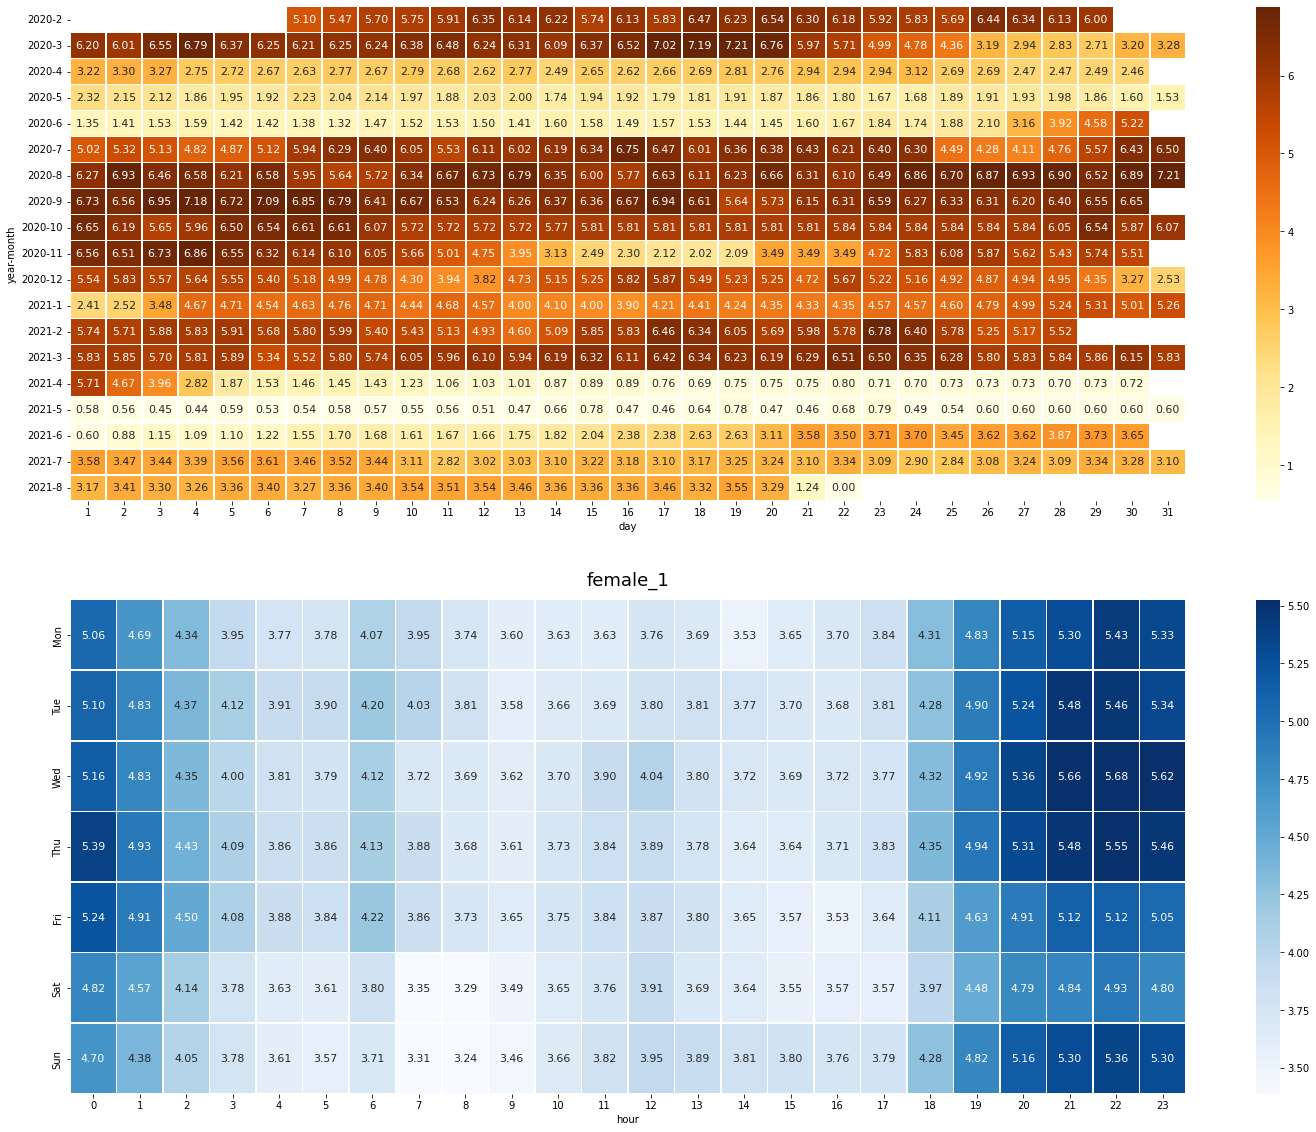

In [ ]:
plot_heatmap(elec_use['female_1'])

# Plot each montha

In [ ]:
def daily_elec_use(data):
  df_test = pd.DataFrame(data).copy()
  sum_hour = df_test.resample('1H').sum()
  row_each_day = sum_hour.values[:-1].reshape(-1, 24)
  df_24hour = pd.DataFrame(row_each_day)
  fig = go.Figure()
  for i in df_24hour.values:
    fig.add_traces(go.Scatter(x=df_24hour.columns.to_list(), y = i, line=dict(color='royalblue')))
  fig.show()

In [ ]:
df_test = pd.DataFrame(elec_use['female_1']).copy()
df_hour = df_test.resample('1H').sum()
df_hour['hour'] = [i.hour for i in df_hour.index]
df_hour['day'] = [i.day for i in df_hour.index]
df_hour['month'] = [i.month for i in df_hour.index]
df_hour['year'] = [i.year for i in df_hour.index]
df_hour['day_name'] = [i.day_name() for i in df_hour.index]
df_hour['is_weekday'] = ['Weekend' if i.day_name() in ['Saturday', 'Sunday'] else 'Weekday' for i in sum_hour.index]

In [ ]:
fig = go.Figure()
for date, df in df_hour.groupby(by=['year', 'month']):
 for day in df['day'].unique():
   
   df1 = df[df['day'] == day]
   
   if df1['is_weekday'].unique() == 'Weekday': color = 'blue'
   else: color = 'red'
  
   fig.add_traces(go.Scatter(x=df1.hour, y = df1['female_1'], 
                             line=dict(color=color)))
   fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = make_subplots(rows=5, cols=4)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

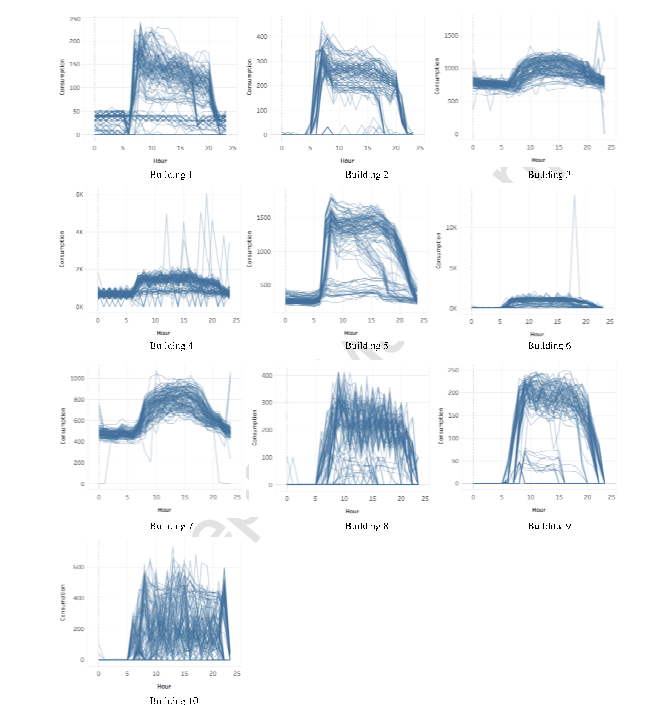

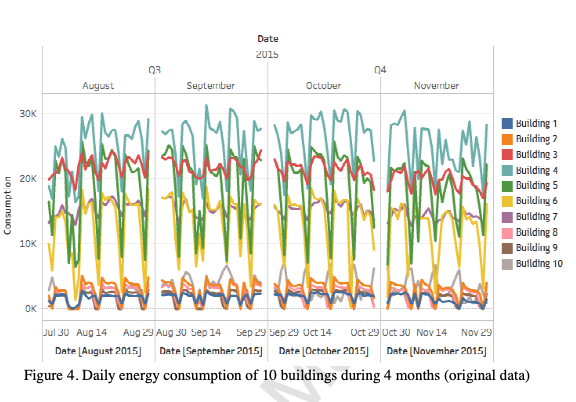

In [ ]:
def customized_heatmap(df):
    corr_df = df.copy()
    # Get only half portion of corr_df to avoid df, so create mask    
    mask = np.triu(np.ones_like(corr_df), k=1)

    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cbar=False,
                     cmap='BrBG', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.15 < t < 0.15:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks( size='x-large')
    plt.yticks(rotation=0, size='x-large')
    #Save fig uncomment first
    #plt.savefig("Heatmap DF")
    plt.show()

# Correlation
- self correlation(ACF, PACF)
- cross correlation (cross correlation, mutual information)

https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0
https://medium.com/swlh/a-deep-conceptual-guide-to-mutual-information-a5021031fad0

### Correlation is Not Causation 
https://towardsdatascience.com/correlation-is-not-causation-ae05d03c1f53

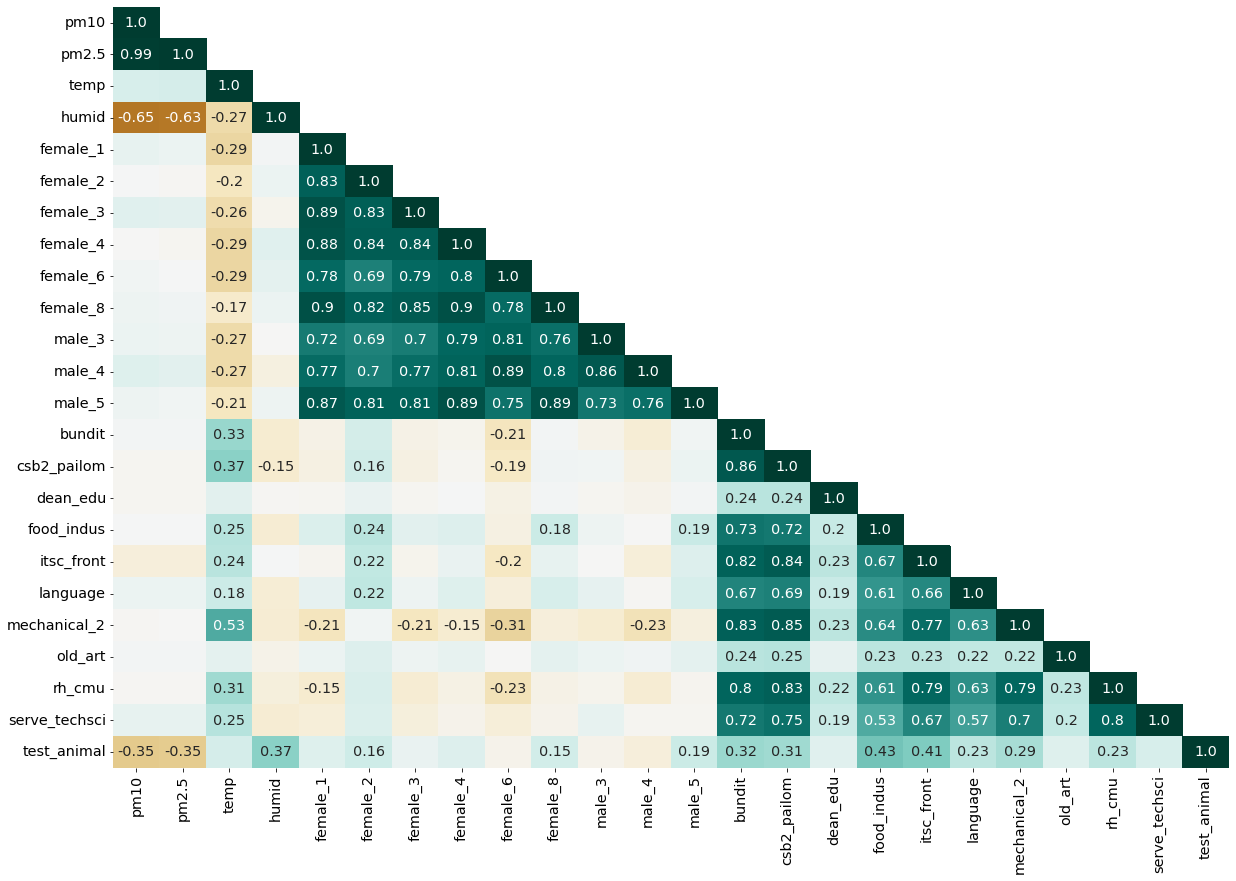

In [ ]:
# Pearson correlation
customized_heatmap(elec_use.corr())